# Titanic: Machine Learning from Disaster

## 整体思路
* 数据分析
* 离群处理
* 特征工程
* 模型融合

## 数据分析

In [10]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

%matplotlib inline

In [2]:
data_train = pd.read_csv("Train.csv")

In [51]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Survived：是否存活（0代表否，1代表是）
* Pclass：社会阶级（1代表上层阶级，2代表中层阶级，3代表底层阶级）
* Name：船上乘客的名字
* Sex：船上乘客的性别
* Age:船上乘客的年龄（可能存在 NaN）
* SibSp：乘客在船上的兄弟姐妹和配偶的数量
* Parch：乘客在船上的父母以及小孩的数量
* Ticket：乘客船票的编号
* Fare：乘客为船票支付的费用
* Cabin：乘客所在船舱的编号（可能存在 NaN）
* Embarked：乘客上船的港口（C 代表从 Cherbourg 登船，Q 代表从 Queenstown 登船，S 代表从 Southampton 登船）

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* Age 只有 714 条数据，有缺失
* Cabin 只有 204 条数据，大量缺失
* Embarked 2 个缺失

In [7]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 生还率 = 0.383838
* 2/3 等舱人数较多
* 平均年龄 29.7 岁
* 兄弟姐妹比父母子女多

## 深入挖掘

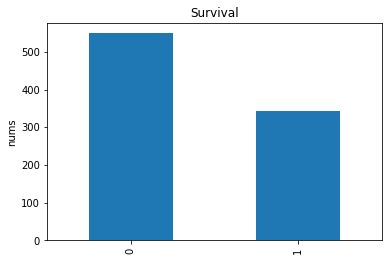

In [37]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set(alpha=0.2)

data_train.Survived.value_counts().plot(kind='bar')
plt.title("Survival")
plt.ylabel("nums")
plt.show()

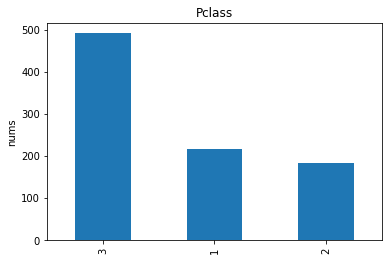

In [36]:
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel("nums")
plt.title("Pclass")
plt.show()

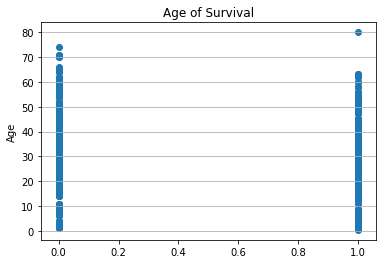

In [35]:
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel("Age")                         
plt.grid(b=True, which='major', axis='y') 
plt.title("Age of Survival")
plt.show()

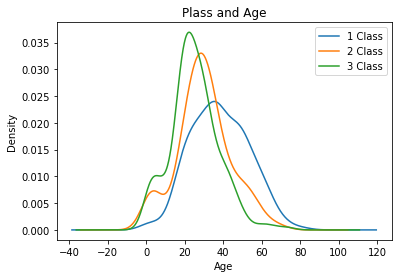

In [34]:
data_train.Age[data_train.Pclass == 1].plot(kind='kde')
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Plass and Age")
plt.legend(("1 Class", "2 Class", "3 Class"),loc="best")
plt.show()

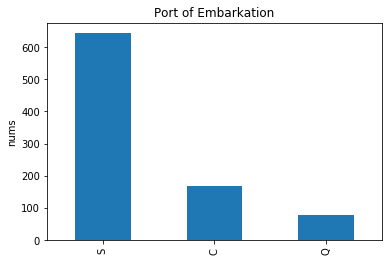

In [33]:
data_train.Embarked.value_counts().plot(kind='bar')
plt.title('Port of Embarkation')
plt.ylabel('nums')
plt.show()

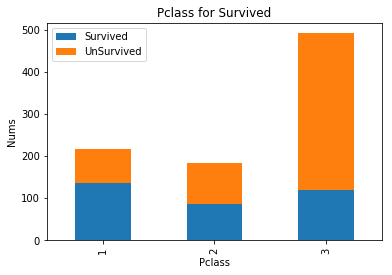

In [43]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({'Survived': Survived_1, 'UnSurvived': Survived_0})
df.plot(kind='bar', stacked=True)
plt.title('Pclass for Survived')
plt.xlabel('Pclass')
plt.ylabel('Nums')
plt.show()

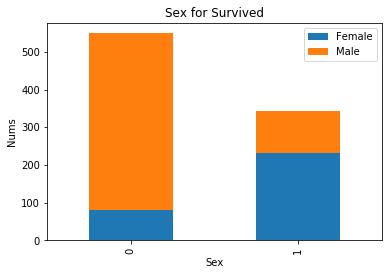

In [52]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df = pd.DataFrame({'Male': Survived_m, 'Female': Survived_f})
df.plot(kind='bar', stacked=True)
plt.title('Sex for Survived')
plt.xlabel('Sex')
plt.ylabel('Nums')
plt.show()

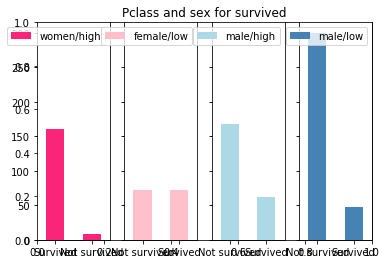

In [83]:
fig=plt.figure()
fig.set(alpha=0.2) 
plt.title("Pclass and sex for survived")

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels(["Survived", u"Not survived"], rotation=0)
ax1.legend(["women/high"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels(["Not survived", "Survived"], rotation=0)
plt.legend([u"female/low"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels(["Not survived", "Survived"], rotation=0)
plt.legend(["male/high"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels(["Not survived", "Survived"], rotation=0)
plt.legend(["male/low"], loc='best')

plt.show()

In [ ]:
fig = plt.figure()
fig.set(alpha=0.2)